In [1]:
from astropy.io import fits
import pandas as pd

from Analysis import plot_sky_density_FS
from Analysis import plot_sky_density_healpy


# Density Maps (1/2) - Including all b

In [2]:
# File path
rgb_data_path = 'data/Allsky_Gaia_42481846_extinction_corrected_filtered.fits'

# Load the FITS file with data used in this analysis
with fits.open(rgb_data_path, memmap=True) as hdul:
    data = hdul[1].data 
    ra = data['ra']
    dec = data['dec']
    l = data['l']
    b = data['b']
    dered_G = data['dered_G']
    dered_BP_RP = data['dered_BP_RP']

# magnitude cut
mag_bins = [14., 18.5]

# -------------------------------
# Global filter: color + magnitude
# -------------------------------
w = (dered_BP_RP > 1.0) & (dered_G > mag_bins[0]) & (dered_G < mag_bins[1])

# Apply to all relevant arrays
ra = ra[w]
dec = dec[w]
l = l[w]
b = b[w]
dered_G = dered_G[w]

# -------------------------------
# All-sky dataframe (Galactic)
# -------------------------------
all_sky = pd.DataFrame({
    'l': l,
    'b': b,
    'dered_G': dered_G
})

# -------------------------------
# Field-of-stream (FoS) filter in RA/Dec
# -------------------------------
fs_ra_min, fs_ra_max = 125.0, 220.0
fs_dec_min, fs_dec_max = -10.0, 50.0

mask = (ra >= fs_ra_min) & (ra <= fs_ra_max) & (dec >= fs_dec_min) & (dec <= fs_dec_max)

# Create filtered dataframe
fs_filtered = pd.DataFrame({
    'ra': ra[mask],
    'dec': dec[mask],
    'dered_G': dered_G[mask]
})

## Field of Streams View

Contrast Limits: 5.00 to 11.00


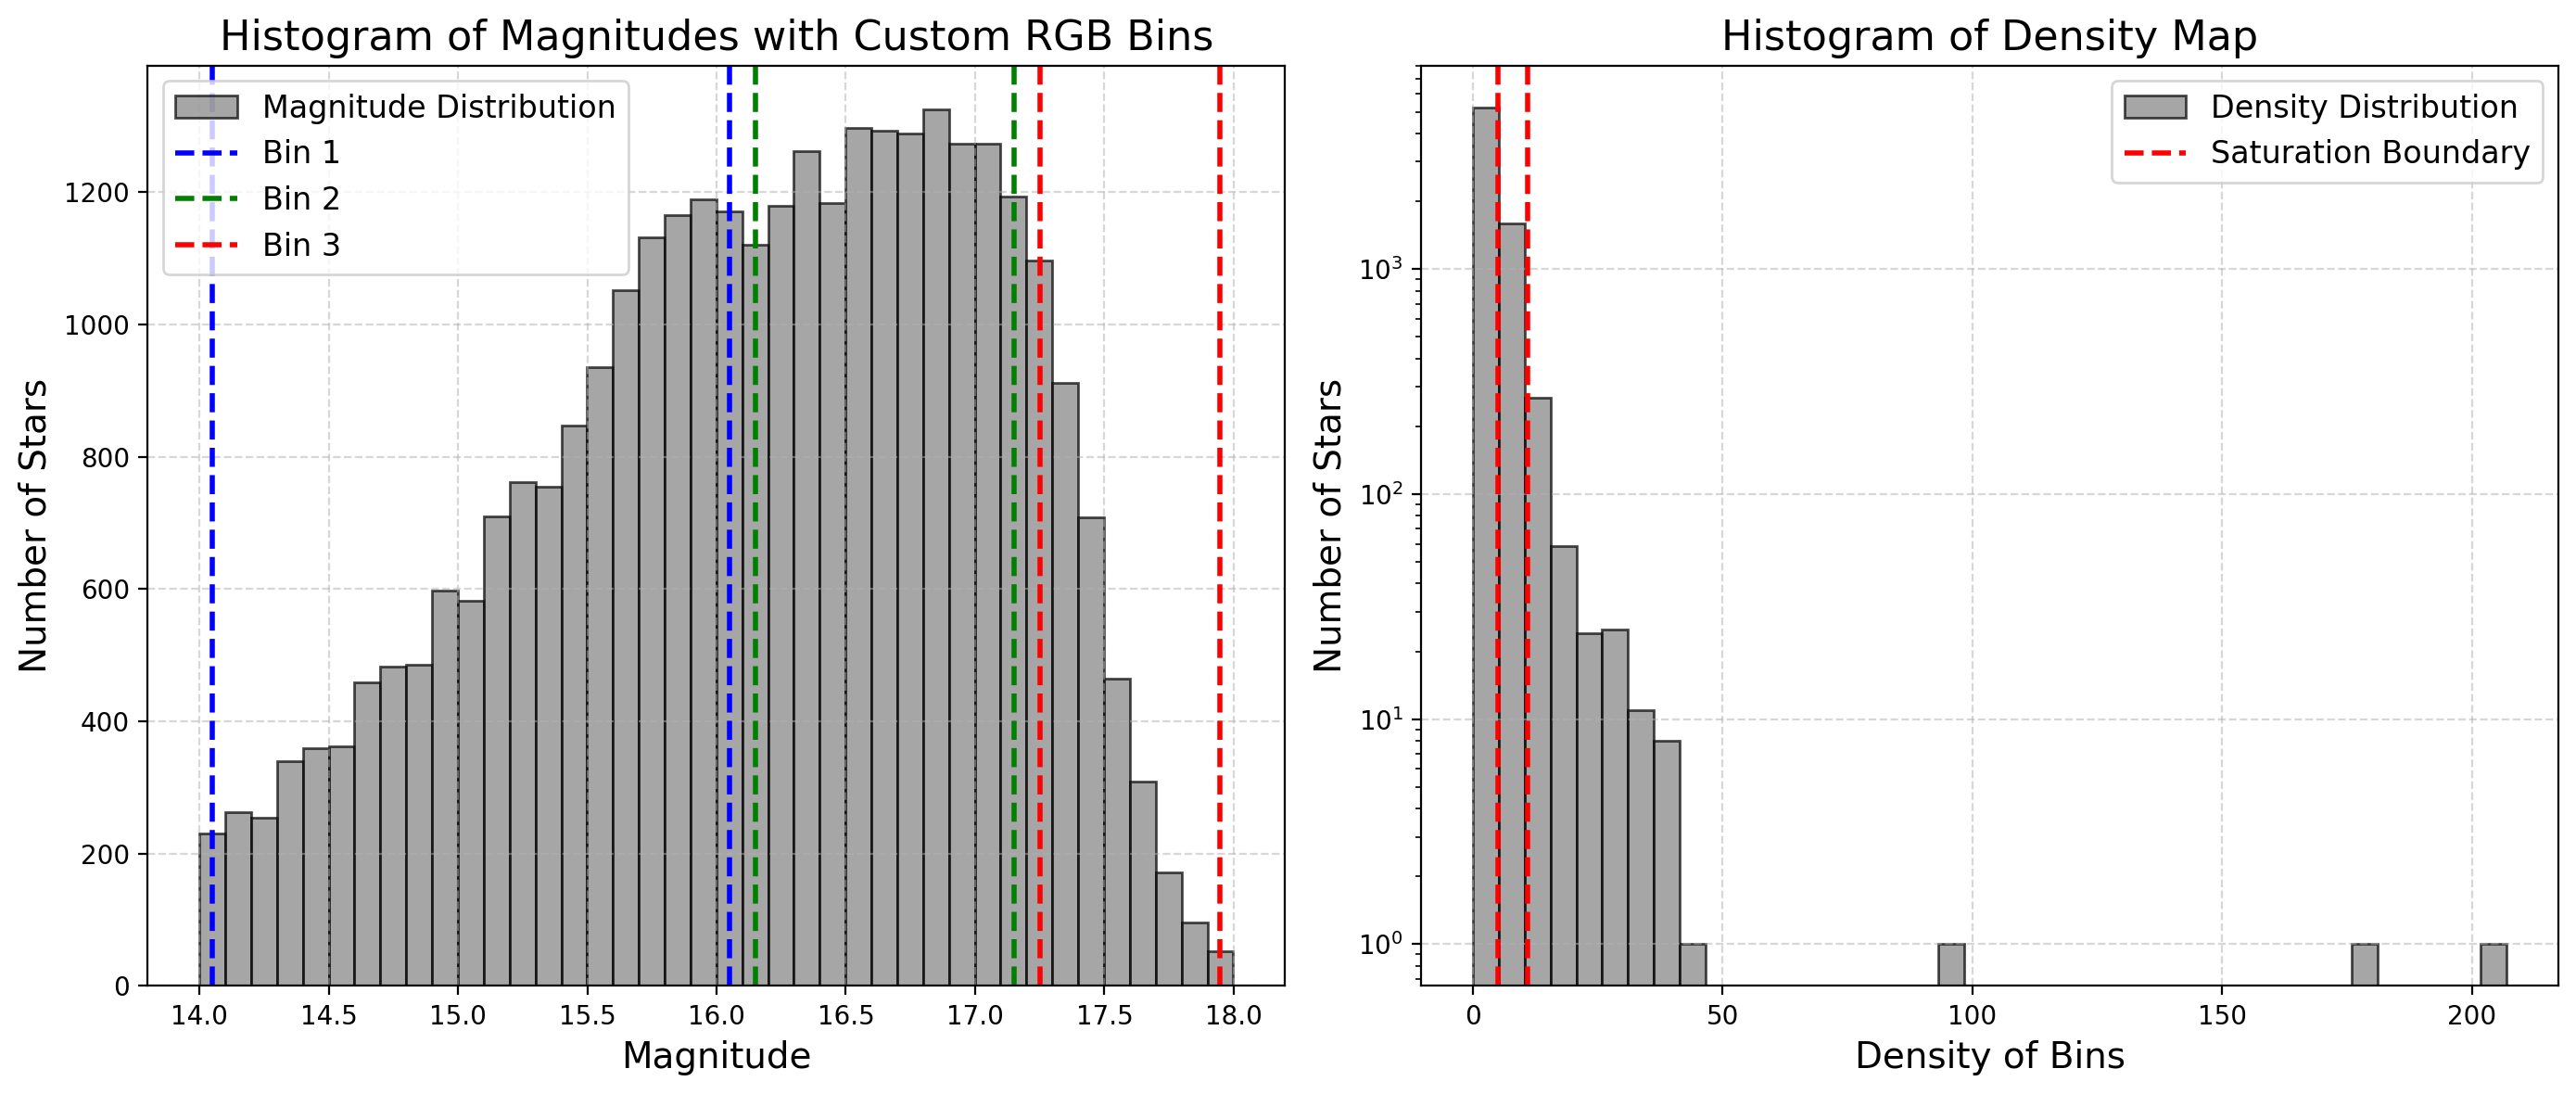

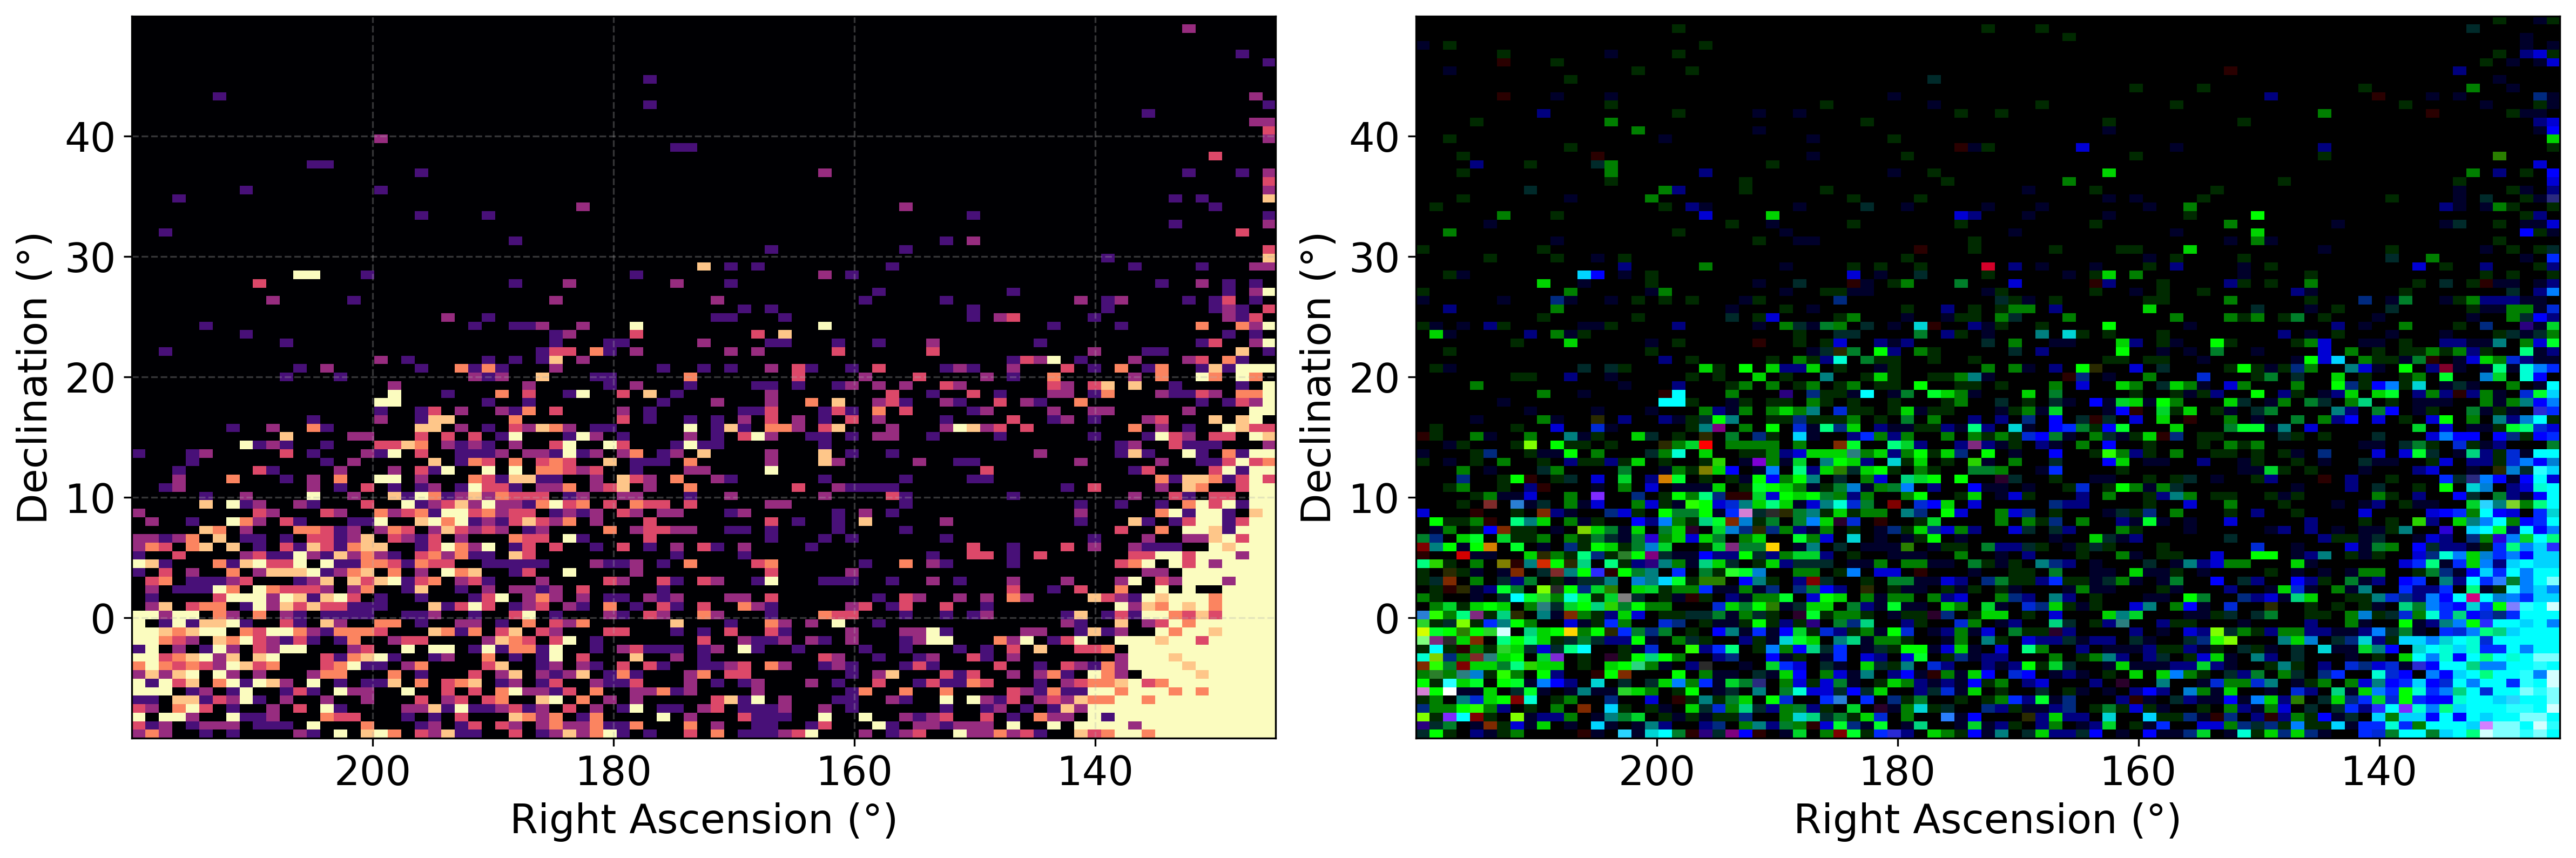

In [3]:
plot_sky_density_FS(fs_filtered, bins=85, contrast = (60,95), binning_method=(16.1,17.2), cmap_density="magma", density_bins = 40 , log_scale=True)

# All Sky View

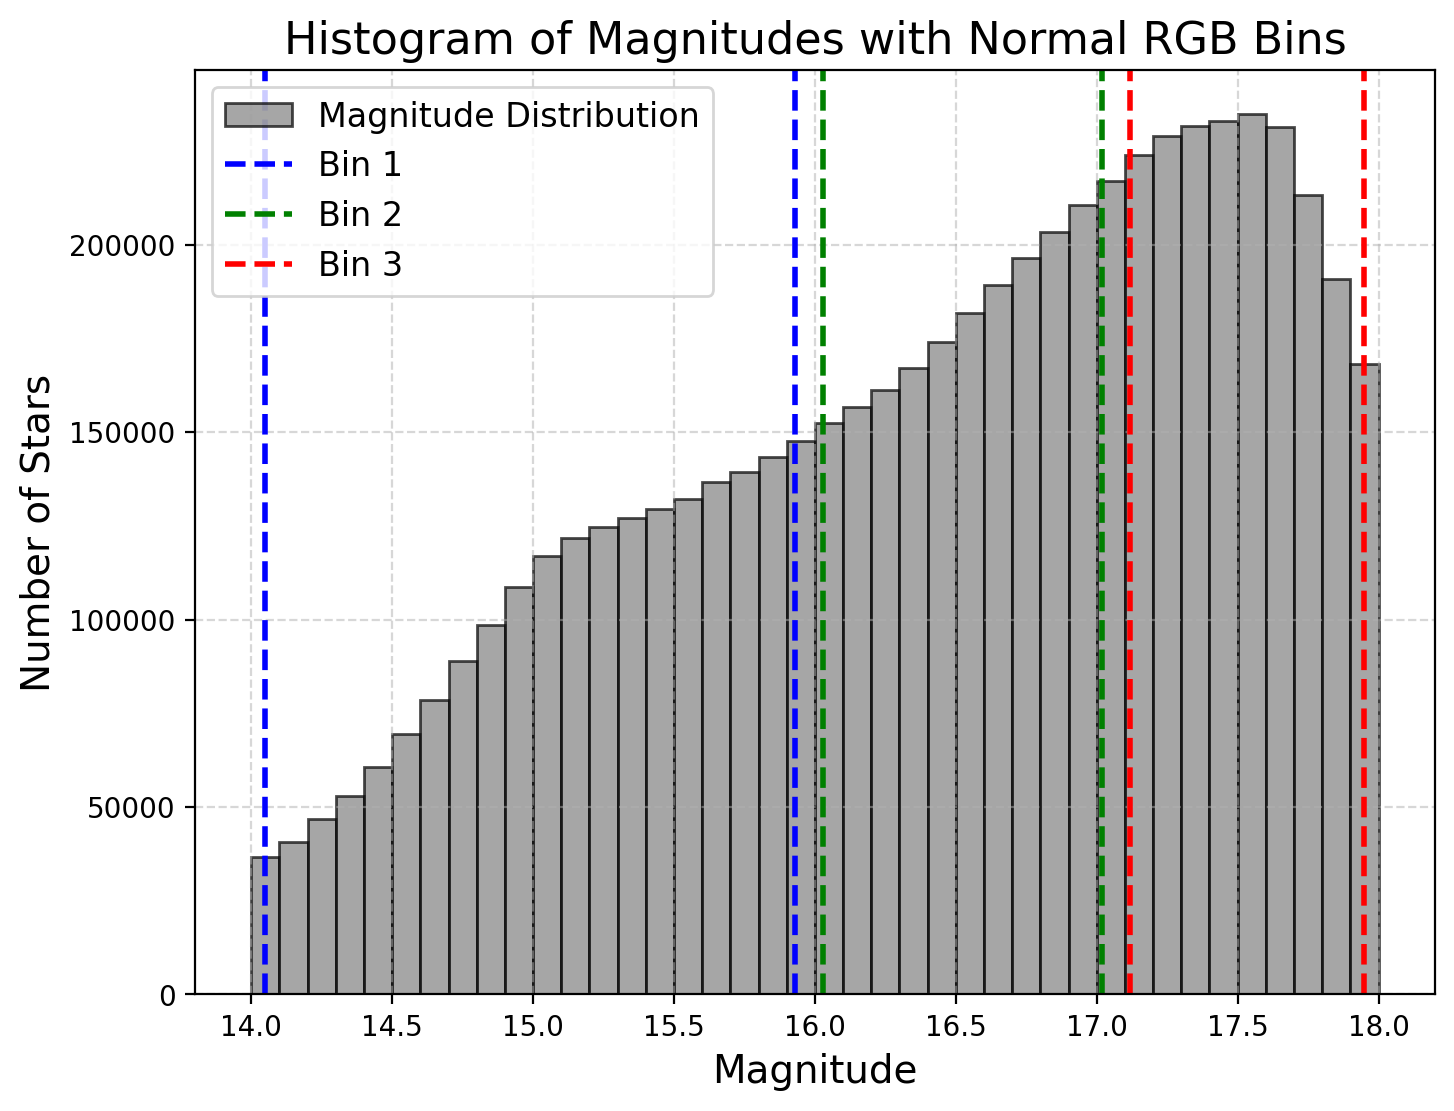

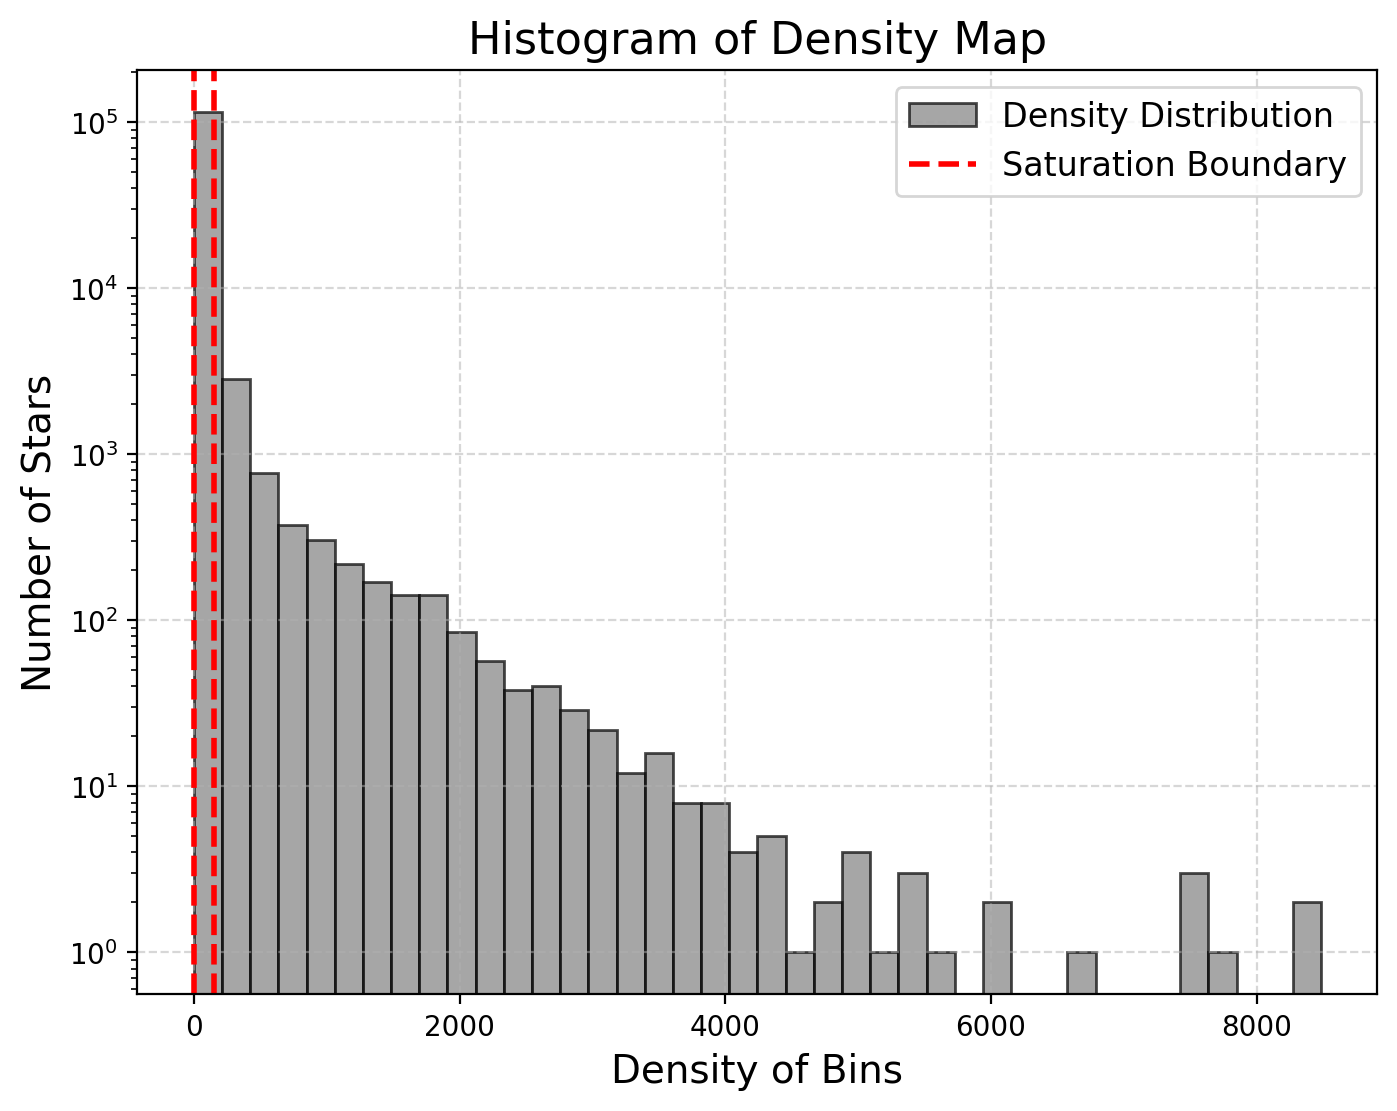

2025-03-23 18:17:08,780 - INFO - 0.0 180.0 -180.0 180.0
2025-03-23 18:17:08,780 - INFO - The interval between parallels is 30 deg -0.00'.
2025-03-23 18:17:08,787 - INFO - The interval between meridians is 30 deg -0.00'.


<Figure size 2000x1200 with 0 Axes>

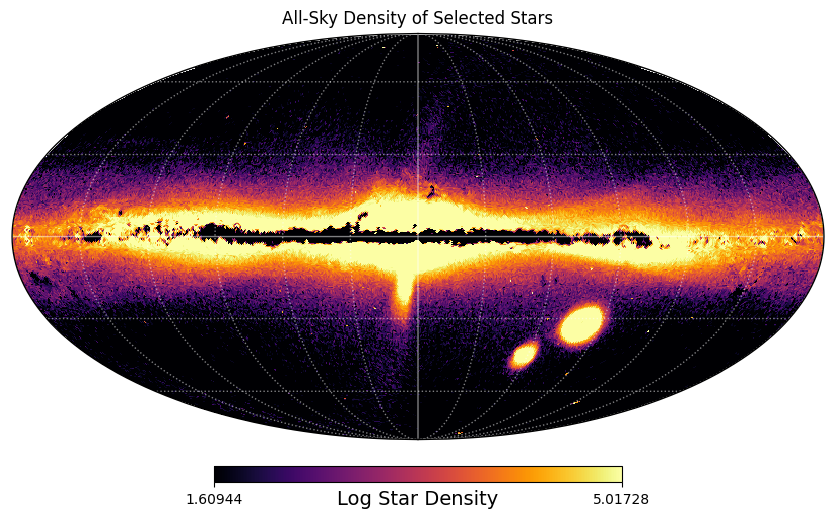

<Figure size 2000x1200 with 0 Axes>

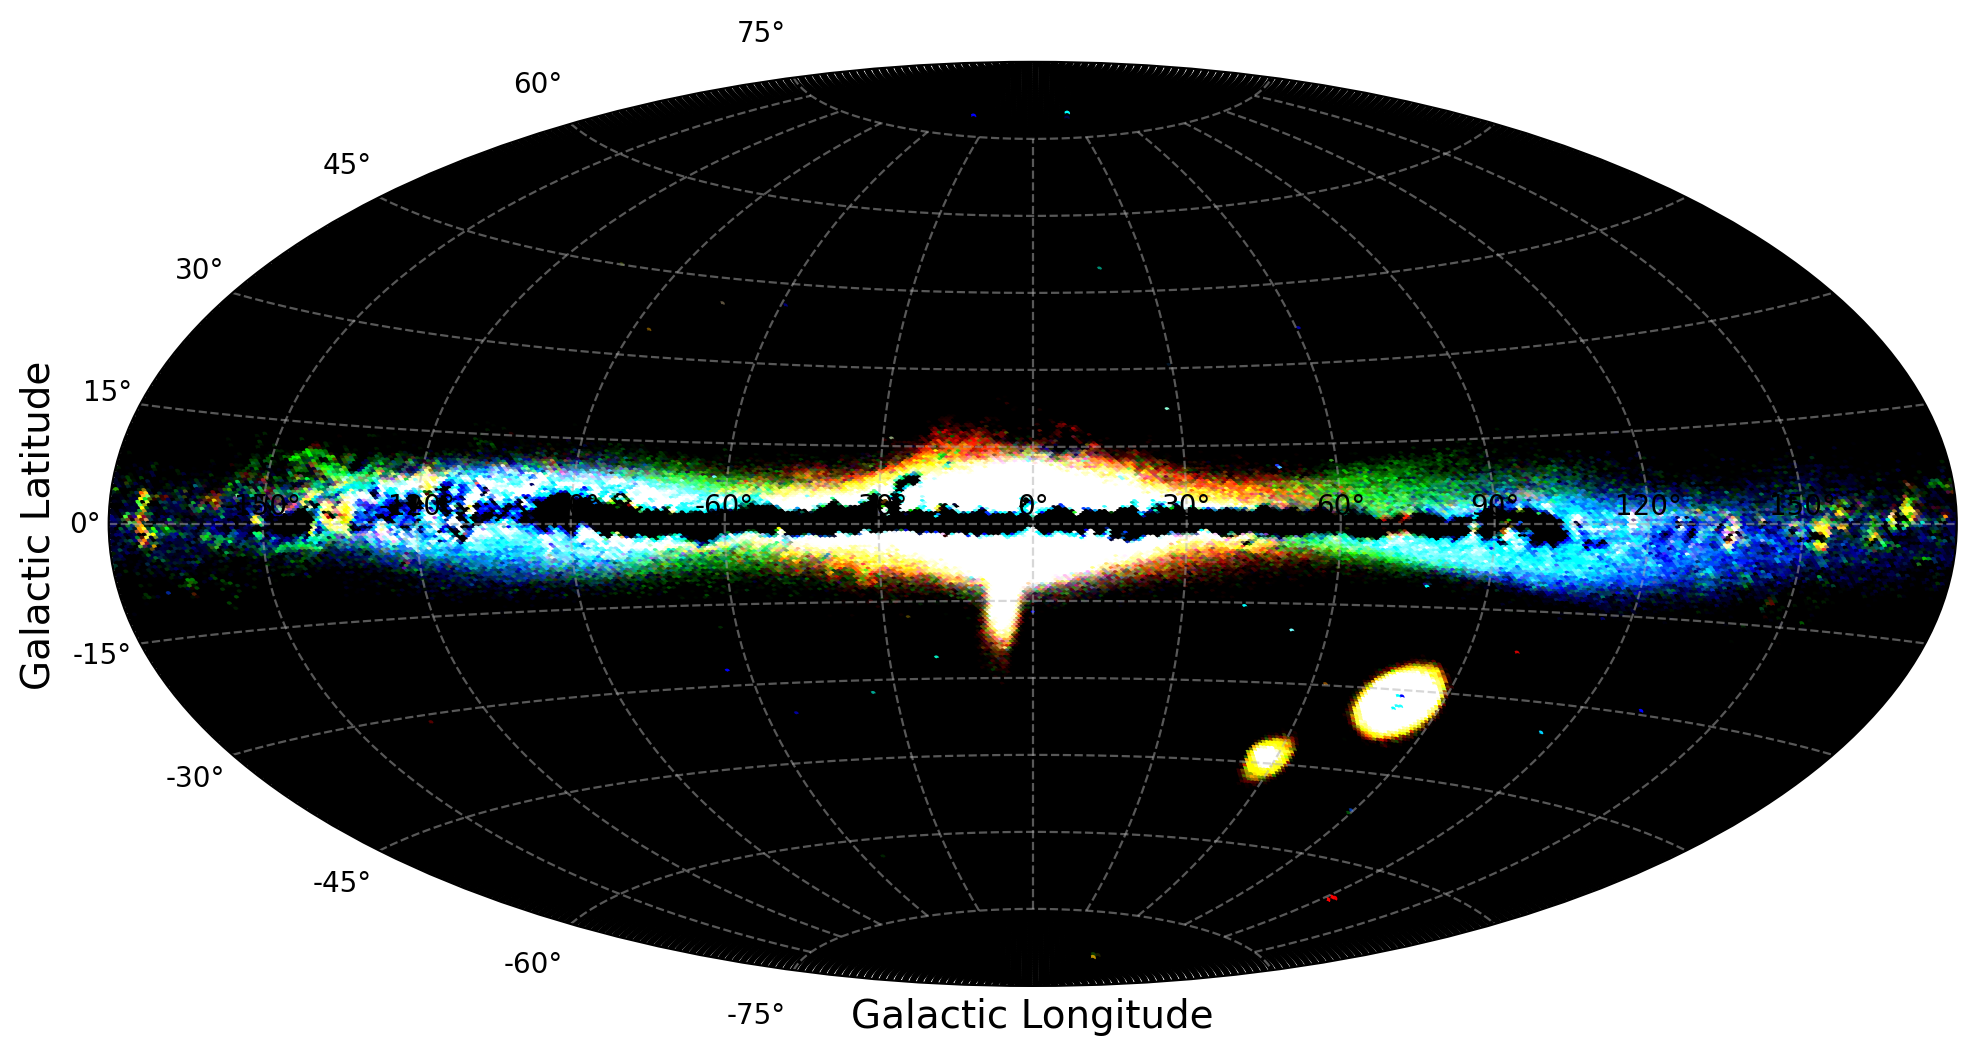

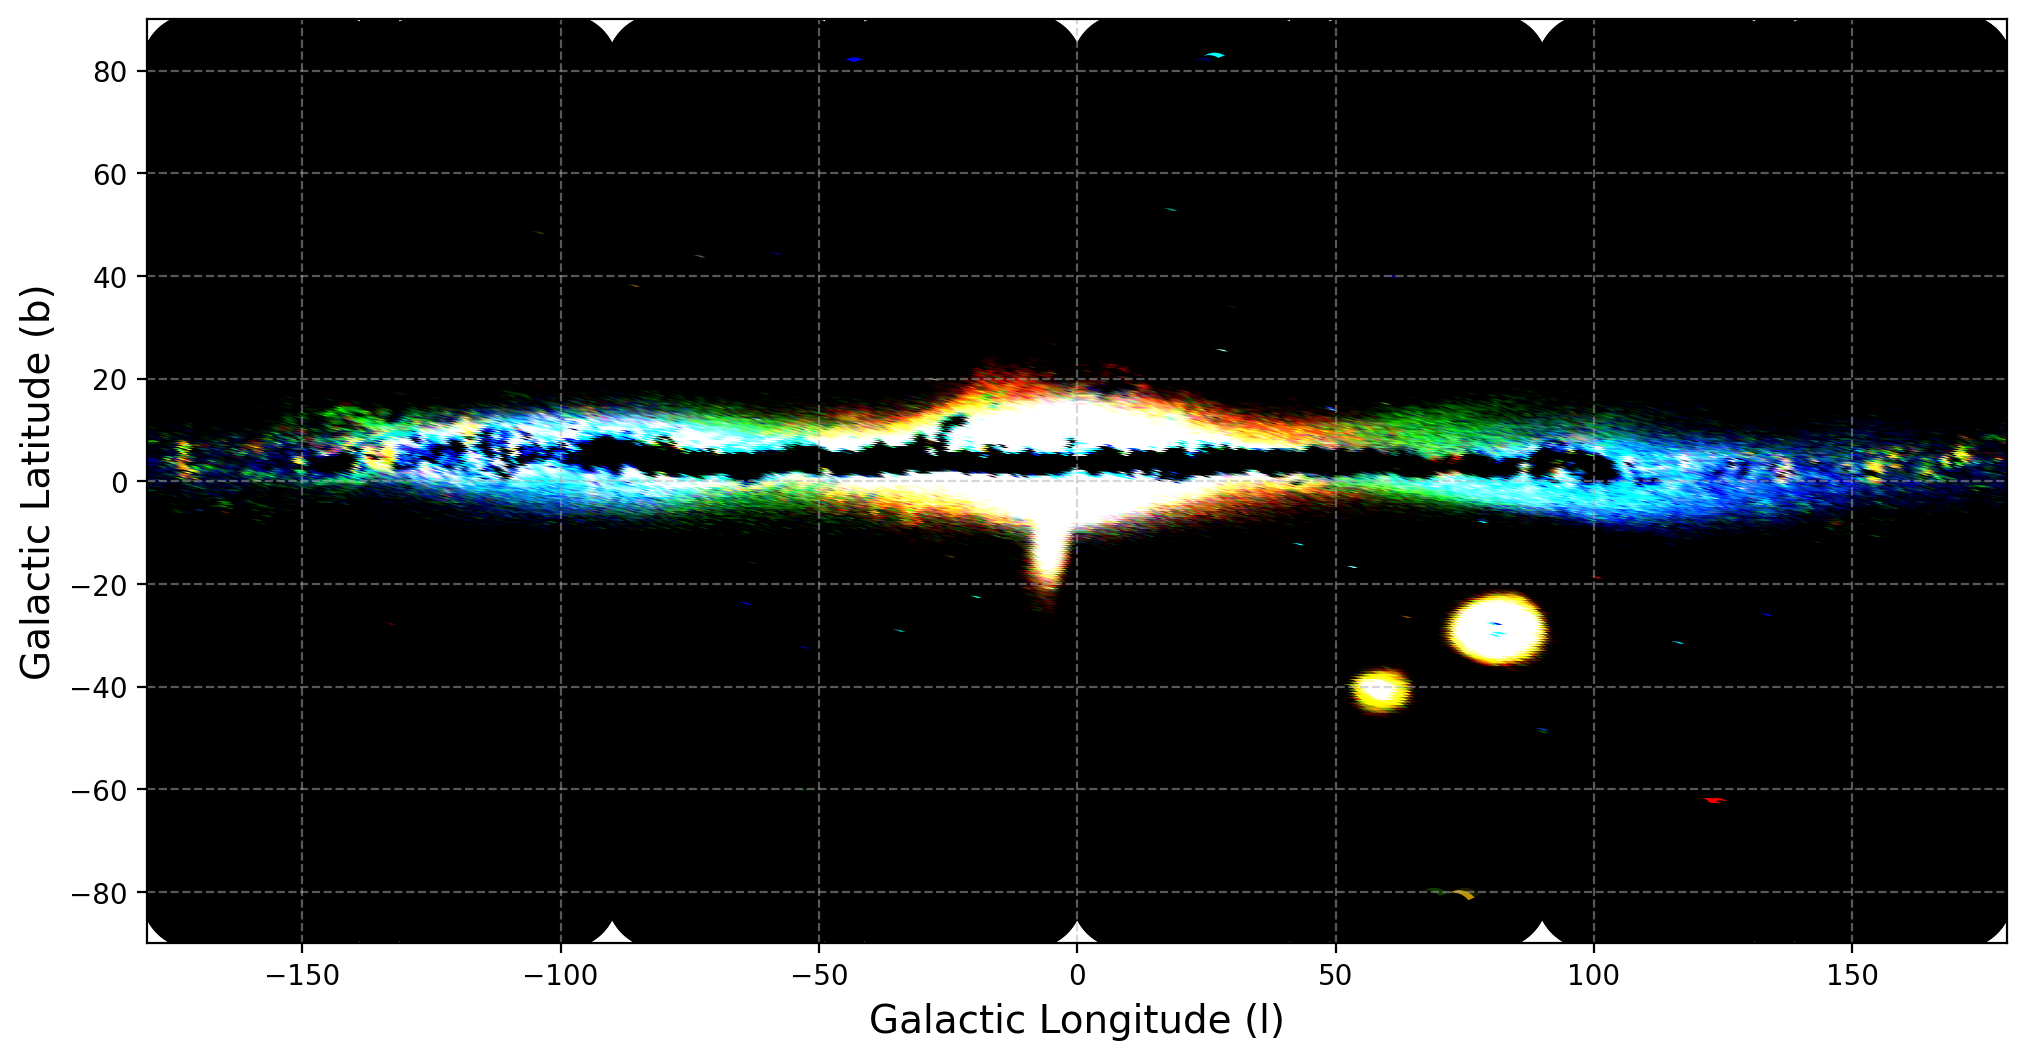

In [4]:
plot_sky_density_healpy(all_sky, nside=100, contrast=(80, 93), vmin =4 , vmax = 150, binning_method='normal', 
                             cmap_density="inferno", cmap_rgb="plasma", log_scale=True)